<a href="https://colab.research.google.com/github/danielpiccoli1/notebooks-danielp/blob/master/Trabalho_Final_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TABALHO FINAL - DATA SCIENCE

Nome: Daniel João Piccoli

# 01 - FRAME THE PROBLEM

A presente análise explica o perfil dos investidores do tesouro direto na região de Santa Catarina atráves da consulta da base de dados de investidores disponibilizada no formato CSV na plataforma de dados publicos do governo do Brasil.

**Principais Objetivos**

* Obter informações quantitativas em relação ao número de investidores ao passar do tempo;
* Obter informações sobre faixa etária e genêro dos investidores;
* Obter informações sobre a cidade, estado civil e profissão do investidor;
* Concluir como os dados representam os investidores dessa modalidade.

**Restrições:**

* Somente considerar relevante resultados com no minimo 100 investidores;
* Somente considerar como válido os dados onde a idade do investidor seja maior ou igual à 18 anos;
* Somente Investidores Ativos;
* Somente Investidores com movimentação nos últimos 12 meses;
* Analisar somente os dados dos últimos 5 anos.


#02 - COLLECT RAW DATA

A seguir realizamos a instalação da biblioteca pydrive que por sua vez será utilizada para realizar a conexão com o GoogleDrive onde foi salvo e compatilhado o CSV contendo as informações dos investidores do tesouro direto que estão disponiveis para consulta publica.

Link para o dataset: http://dados.gov.br/dataset/investidores-do-tesouro-direto


In [0]:
# Imporação das bibliotecas que serão utiliazadas na limpeza, análise e exibição dos dados coletados no site do governo
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [0]:
url = "http://www.tesourotransparente.gov.br/ckan/dataset/48a7fd9d-78e5-43cb-bcba-6e7dcaf2d741/resource/0fd2ac86-4673-46c0-a889-b46224ade563/download/InvestidoresTesouroDireto.csv"

In [0]:
# Definição do DataFrame a partir do csv que foi obtido do Drive. Observe que o delimitador foi definido manualmente para ';' bem como a codificação que não é UTF-8 e sim Windows-1252
df = pd.read_csv(url,sep=';', error_bad_lines=False,encoding='windows-1252')

# 03 - PROCESS THE DATA

A partir deste ponto já temos os dados armazenados em um DataFrame df que agora será processado para posterior análise.

In [4]:
# Exibição os tipos dos dados que compõe o DataFrame
df.dtypes

Codigo do Investidor     int64
Data de Adesao          object
Estado Civil            object
Genero                  object
Profissao               object
Idade                    int64
UF do Investidor        object
Cidade do Investidor    object
Pais do Investidor      object
Situacao da Conta       object
Operou 12 Meses         object
dtype: object

In [5]:
# Exibição do cabeçalho dos dados, permitindo assim uma visão de como estão formatados os dados em cada coluna.
df.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses
0,744,13/04/2009,Casado(a) com brasileiro(a) nato(a),M,EMPRESÁRIO,50,RJ,RIO DE JANEIRO,BRASIL,A,N
1,1836,10/09/2003,Casado(a) com brasileiro(a) nato(a),M,ENGENHEIRO,61,SP,SAO PAULO,BRASIL,D,N
2,2056,13/07/2005,Casado(a) com brasileiro(a) nato(a),F,PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL,78,SP,SAO PAULO,BRASIL,D,N
3,2187,29/09/2003,Casado(a) com brasileiro(a) nato(a),M,EMPRESÁRIO,59,SP,SAO PAULO,BRASIL,D,N
4,2259,15/09/2004,Casado(a) com brasileiro(a) nato(a),M,APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO),56,SP,SAO PAULO,BRASIL,D,N


In [0]:
# Transformação de tipo dados de Object para Int64 com o intuito de facilitar as análises
operacao = {'N': 0, 'S': 1}  # N = Não ; S = Sim
situacao = {'A': 1, 'D': 0}  # A = Ativo ; D = Desativado
genero = {'M': 1, 'F': 2, 'N': 3} # M = Masculino ; F = Feminino ; N = Não Definido

df = df.replace({'Operou 12 Meses': operacao, 'Situacao da Conta': situacao, 'Genero': genero}) # Realiza a substituição das colunas conforme definido no mapeamento acima.

In [0]:
# Aplica as restrições ao DataFrame

df = df.loc[df['Pais do Investidor'] == 'BRASIL'] # Somente Brasil
df = df.loc[df['UF do Investidor'] == 'SC'] # Somente Santa Catarina
df = df.loc[df['Situacao da Conta'] == 1] # Somente contas ativas
df = df.loc[df['Operou 12 Meses'] == 1] # Somente contas operadas nos ultimos 12 meses
df = df.loc[df['Idade'] >= 18] # Somente investidores com 12 anos ou mais

In [0]:
# Alteração do tipo da coluna Data de Adesão de 'object' para 'datetime64[ns]'
df['Data de Adesao'] = pd.to_datetime(df['Data de Adesao'])

# Extrai somente o ano da coluna Data de Adesão
df['Data de Adesao'] = df['Data de Adesao'].dt.year

# Aplica o filtro para buscar somente dados dos últimos 5 anos 
df = df.loc[df['Data de Adesao'] > datetime.now().year-5]

In [0]:
# Adiciona um coluna para contagem de registros
df['Count'] = 1

In [0]:
# Remove as colunas que não serão utilizadas nas análises
df = df.drop(['Codigo do Investidor','Pais do Investidor','UF do Investidor','Situacao da Conta','Operou 12 Meses'], axis=1)


In [11]:
# Vizualiza vamente o cabeçalho dos dados após a limpeza e restrição
df.head()

,Data de Adesao,Estado Civil,Genero,Profissao,Idade,Cidade do Investidor,Count
608,2015,Casado(a) com brasileiro(a) nato(a),1,DIRETOR DE EMPRESAS,64,JARAGUA DO SUL,1
656,2016,Solteiro(a),2,ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS,34,JARAGUA DO SUL,1
1469,2017,Casado(a) com brasileiro(a) nato(a),1,ADVOGADO,41,RIO DO SUL,1
1534,2017,Solteiro(a),1,ENGENHEIRO,36,FLORIANOPOLIS,1
1595,2015,Solteiro(a),1,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",41,JOINVILLE,1


# 04 - EXPLORE THE DATA

A seguir podemos apreciar a descrição e plotagem dos grafos que ilustram as infomações extraidas do DataFrame.

** Análise de Investidores por gênero**

In [12]:
# Total de Investidores de cada gênero
df.groupby('Genero').describe()[['Count']]

Count                                   
          count mean  std  min  25%  50%  75%  max
Genero                                            
1       16578.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2        5750.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

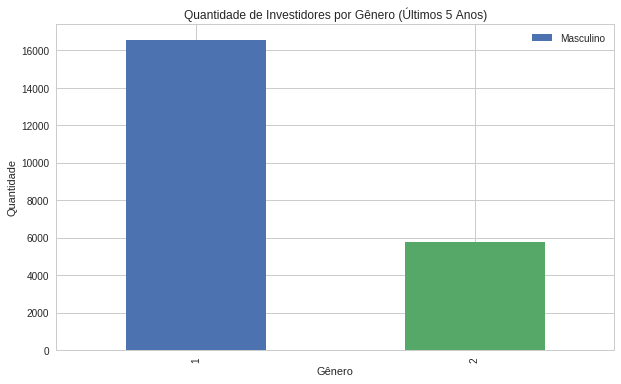

In [13]:
gen = df.groupby('Genero')['Count'].count()
gen.plot(kind='bar',figsize=(10, 6))
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Quantidade de Investidores por Gênero (Últimos 5 Anos)')
plt.legend(('Masculino', 'Feminino', 'Não Definido'), loc='upper right', shadow=True)
plt.show()

In [0]:
g = df.groupby(['Data de Adesao','Genero'])
i = g.count()

grp_genero = i.reset_index()
grp_genero = grp_genero.loc[grp_genero['Count'] > 0]

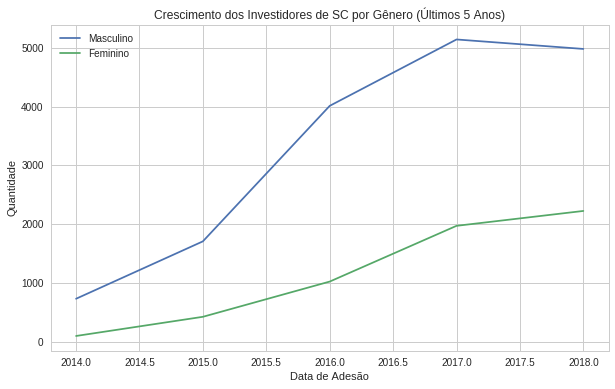

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for label, grp in grp_genero.groupby('Genero'):
    grp.plot(x = 'Data de Adesao', y = 'Count',ax = ax, label = label,)
    plt.xlabel('Data de Adesão')
    plt.ylabel('Quantidade')
    plt.title('Crescimento dos Investidores de SC por Gênero (Últimos 5 Anos)')
    plt.legend(('Masculino', 'Feminino', 'Não Definido'), loc='upper left', shadow=True)

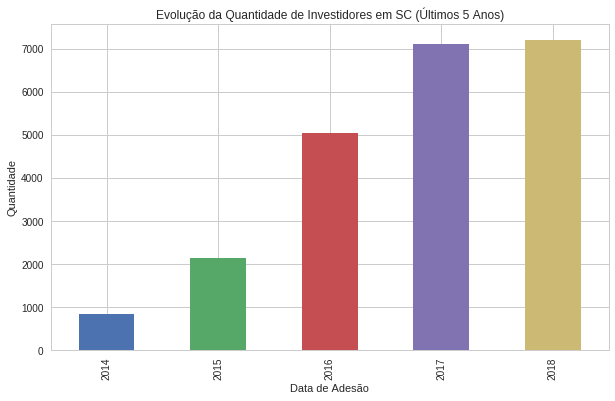

In [16]:
dt = df.groupby('Data de Adesao')['Idade'].count()
dt[dt > 0].plot(kind='bar',figsize=(10, 6))
plt.xlabel('Data de Adesão')
plt.ylabel('Quantidade')
plt.title('Evolução da Quantidade de Investidores em SC (Últimos 5 Anos)')

plt.show()

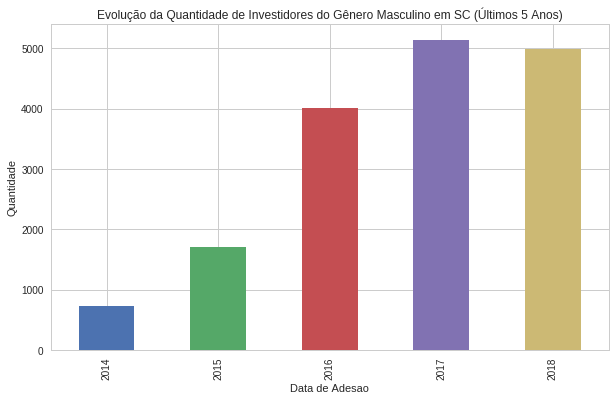

In [17]:
df_masculino = df.loc[df['Genero'] == 1]
df_masculino = df_masculino.groupby('Data de Adesao')['Idade'].count()
plt.xlabel('Data de Adesão')
plt.ylabel('Quantidade')
plt.title('Evolução da Quantidade de Investidores do Gênero Masculino em SC (Últimos 5 Anos)')
df_masculino[df_masculino > 0].plot(kind='bar',figsize=(10, 6))
plt.show()

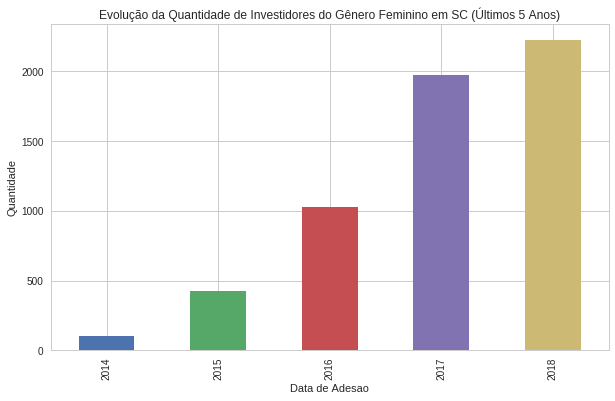

In [18]:
df_feminino = df.loc[df['Genero'] == 2]
df_feminino = df_feminino.groupby('Data de Adesao')['Idade'].count()
plt.xlabel('Data de Adesão')
plt.ylabel('Quantidade')
plt.title('Evolução da Quantidade de Investidores do Gênero Feminino em SC (Últimos 5 Anos)')
df_feminino [df_feminino  > 0].plot(kind='bar',figsize=(10, 6))
plt.show()

** Análise de Investidores por Idade**

In [19]:
df.groupby('Genero').describe()[['Idade']]

Idade                                                     
          count       mean        std   min   25%   50%    75%   max
Genero                                                              
1       16578.0  34.805163  10.800211  18.0  27.0  33.0  39.00  89.0
2        5750.0  35.142261  11.610778  18.0  27.0  32.0  39.75  87.0

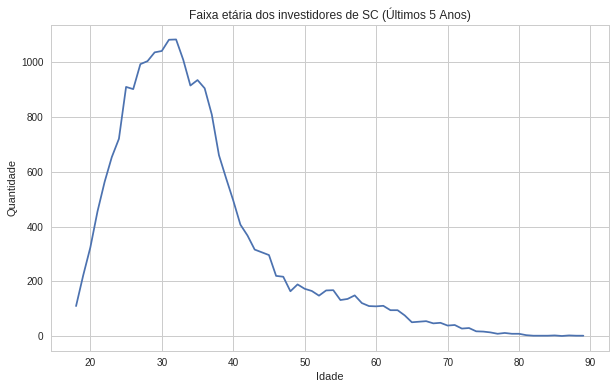

In [20]:
df_idade = df.groupby('Idade')['Idade'].count()
df_idade[df_idade > 0].plot(kind='line',figsize=(10, 6))
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Faixa etária dos investidores de SC (Últimos 5 Anos)')
plt.show()

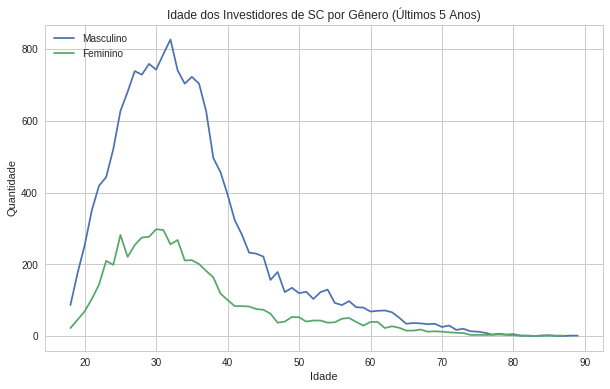

In [21]:
g = df.groupby(['Idade','Genero'])
i = g.count()
grp_idade = i.reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

for label, grp in grp_idade.groupby('Genero'):
    grp.plot(x = 'Idade', y = 'Count',ax = ax, label = label)
    plt.xlabel('Idade')
    plt.ylabel('Quantidade')
    plt.title('Idade dos Investidores de SC por Gênero (Últimos 5 Anos)')
    plt.legend(('Masculino', 'Feminino', 'Não Definido'), loc='upper left', shadow=True)

** Analise de Investidores por Estado Civil, Cidade e Profissão**

In [22]:
df.groupby('Estado Civil').describe()[['Count']]

Count                           \
                                               count mean  std  min  25%  50%   
Estado Civil                                                                    
Casado(a) com brasileiro(a) nato(a)           7907.0  1.0  0.0  1.0  1.0  1.0   
Casado(a) com brasileiro(a) naturalizado(a)      1.0  1.0  NaN  1.0  1.0  1.0   
Desquitado(a)                                    2.0  1.0  0.0  1.0  1.0  1.0   
Divorciado(a)                                  770.0  1.0  0.0  1.0  1.0  1.0   
Separado judic.                                 75.0  1.0  0.0  1.0  1.0  1.0   
Solteiro(a)                                  11943.0  1.0  0.0  1.0  1.0  1.0   
União estável                                 1512.0  1.0  0.0  1.0  1.0  1.0   
Viúvo(a)                                       118.0  1.0  0.0  1.0  1.0  1.0   

                                                       
                                             75%  max  
Estado Civil                                           
Casado(a) com brasileiro(a) nato(a)          1.0  1.0  
Casado(a) com brasileiro(a) naturalizado(a)  1.0  1.0  
Desquitado(a)                                1.0  1.0  
Divorciado(a)                                1.0  1.0  
Separado judic.                              1.0  1.0  
Solteiro(a)                                  1.0  1.0  
União estável                                1.0  1.0  
Viúvo(a)                                     1.0  1.0

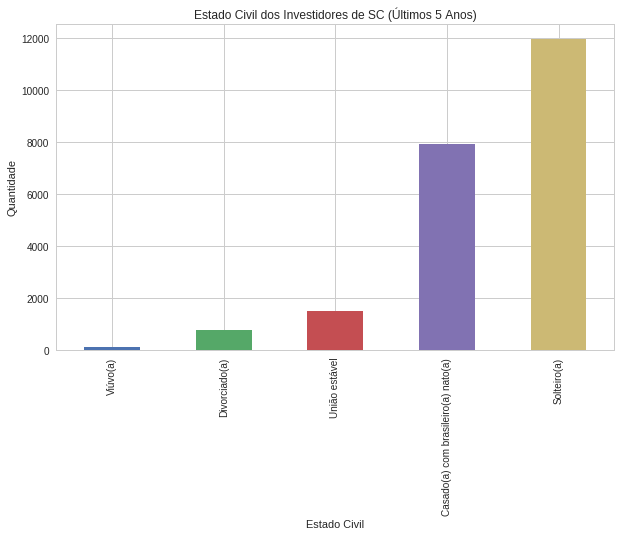

In [31]:
df_ec = df.groupby('Estado Civil')['Idade'].count()
df_ec = df_ec.sort_values(ascending=True)
df_ec[df_ec > 100].plot(kind='bar',figsize=(10, 6))
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade')
plt.title('Estado Civil dos Investidores de SC (Últimos 5 Anos)')
plt.show()

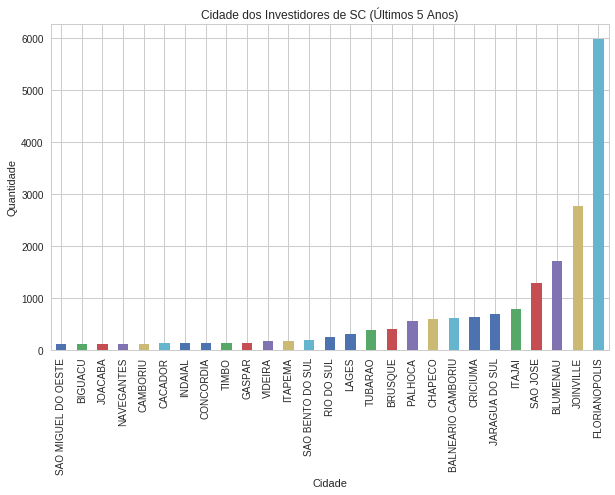

In [24]:
df_ci = df.groupby('Cidade do Investidor')['Idade'].count()
df_ci = df_ci.sort_values()
df_ci[df_ci > 100].plot(kind='bar',figsize=(10, 6))
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.title('Cidade dos Investidores de SC (Últimos 5 Anos)')
plt.show()

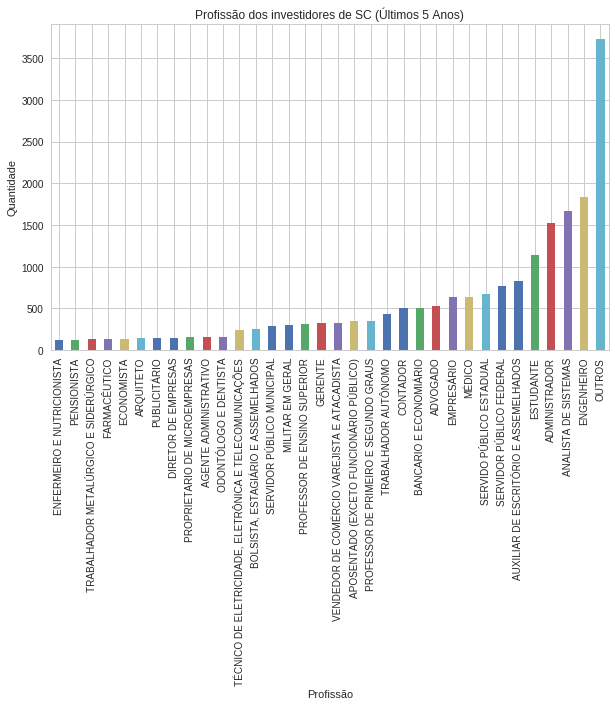

In [25]:
df_pi = df.groupby('Profissao')['Count'].count()
df_pi = df_pi.sort_values()
df_pi[df_pi > 100].plot(kind='bar',figsize=(10, 6))
plt.xlabel('Profissão')
plt.ylabel('Quantidade')
plt.title('Profissão dos investidores de SC (Últimos 5 Anos)')
plt.show()

# 05 - PERFORM IN-DEPTH ANALYSIS

A seguir podemos observar que os principais dados númericos não tem uma forte relação o que nos impede de realizar uma boa análise preditiva no intuito de prever o crescimento do número de investidores. Para esse tipo de análise fica o desafio de reunir mais dados principalmente relacionado as operações que esses investidores realizam.

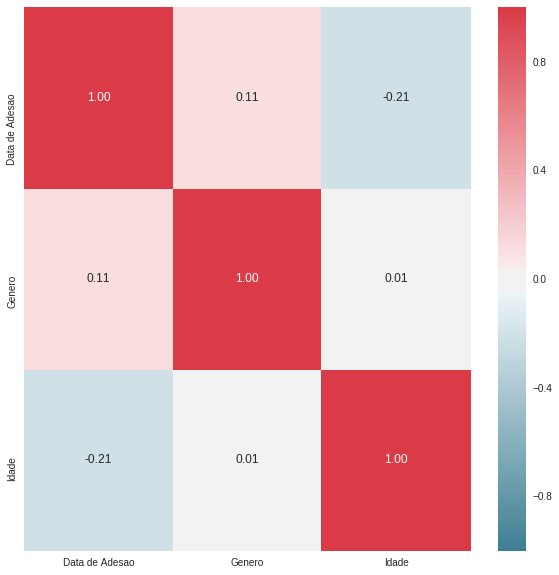

In [26]:
df_corr = df.drop(['Count'], axis=1)
corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.show()

A seguir podemos verificar no gráfico de dispersão o crescimento do número de investidores nos últimos 5 anos

In [0]:
df_analise = df
df_analise = df_analise.groupby(["Data de Adesao"], as_index=False).count()

Text(34.7421,0.5,'Count')

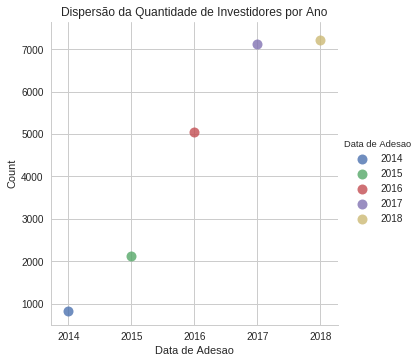

In [28]:
sns.lmplot('Data de Adesao', 
           'Count',
           data=df_analise,
           fit_reg=False,
           hue='Data de Adesao',
           scatter_kws={"marker": "D",
                        "s": 100})

plt.title('Dispersão da Quantidade de Investidores por Ano')
plt.xlabel('Data de Adesao')
plt.ylabel('Count')

Por fim podemos realizar uma descrição do dataset que nos retorna com algumas informações como a idade minima do investidor e a maxima. É interessante notar também a média da idade que é de 33 anos o que nos revela um pouco sobre o perfil do investidor catarinense.

In [29]:
df.describe()

,Data de Adesao,Genero,Idade,Count
count,22328.000000,22328.000000,22328.000000,22328.0
mean,2016.793981,1.257524,34.891974,1.0
std,1.106468,0.437280,11.015377,0.0
min,2014.000000,1.000000,18.000000,1.0
25%,2016.000000,1.000000,27.000000,1.0
50%,2017.000000,1.000000,33.000000,1.0
75%,2018.000000,2.000000,39.000000,1.0
max,2018.000000,2.000000,89.000000,1.0


# 06 - COMMUNICATE RESULTS

A seguir serão apresentadas as conclusões com base nos dados retornados da analise do DataFrame de investidores para o estado de Santa Catarina

** Análise de Investidores por gênero**


---
Com base nos dados apresentados podemos concluir que  de um total de 22.328 investidores os do gênero masculino representam a maioria totalizando 16578, enquanto os do gênero feminino totalizam apenas  5.750. Esses números nos levam a concluir que a presença feminina em números absolutos nos investimentos do Tesouro Direto ainda é pequena.

Contudo é importante mencionar que de 2017 para 2018 houve uma queda do número de adesão de investidores do gênero Masculino enquanto o Feminino aumentou o que indica que apesar dos números absolutos nos últimos anos as mulheres veem aderindo a modalidade com mais força.


** Análise de Investidores por Idade**


---
Em uma análise sobre a faixa etária dos investidores podemos notar que a média global é de 35 anos o que representa também a média individual por gênero que se arredondarmos para números exatos também ficam em 35 Anos (Homens: 34.80, Mulheres: 35.14 ). Esses valores indicam que os catarinenses só aderem a modalidade de investimento em média 17 anos após completarem 18 anos informação essa que pode ser utilizada em futuras análises para associar a fatores socio economicos e também pesquisa sobre o conhecimento da população do estado sobre esse tipo de investimento.



** Analise de Investidores por Estado Civil, Cidade e Profissão**


---
Os dados sobre o estado civil dos investidores indicam que a maioria que investe na modalidade é solteiro o que se revelou ao contrario do senso comum onde pensamos que casados com vida social e financeira estavel são os maiores investidores.

Verificando os dados quantitativos de investidores por cidade podemos dizer que os mesmos refletem a importância econômica e o número de habitantes de cada uma, fato este revelado pela plotagem que mostra Florianopolis e Joinville com o maior número de investidores.

Quando analisamos as profissões é possivel notar que muitos investidores informaram 'Outros' e não a profissão de fato o que nos leva a crer que existe uma inconsistência nos dados ou que eles simplesmente não preencheram a opção, tornando de fato dificil afirmar que essa informação representa os investidores. Contudo as profissões que mais investem são Engenheiros, Analistas de Sistemas, Administrador e Esudante.
